In [1]:
import dhlab.nbtext as nb
import dhlab.graph_networkx_louvain as gnl
import dhlab.module_update as mu
import pandas as pd

In [2]:
mu.update('dhlab_v2')

Updated file `C:\Users\yoons\Documents\Github\Qualico2020\dhlab_v2.py`

In [3]:
mu.update('wordbank')
import wordbank as wb

Updated file `C:\Users\yoons\Documents\Github\Qualico2020\wordbank.py`

In [4]:
import dhlab_v2 as d2

In [5]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22, 'figure.figsize':(14,7), 'lines.linewidth': 6})

In [6]:
#plt.rcParams.keys()

In [7]:
corpus = d2.document_corpus(from_year = 1990, to_year = 2020, limit = 50)

In [8]:
corpus = d2.document_corpus(doctype='digibok', from_year = 1990, to_year = 2020, limit = 50)

In [9]:
d2.konkordans(urns = list(corpus.urn), query="""  "hans arm"   """).style

,docid,urn,conc


In [10]:
d2.konkordans(urns = list(corpus.urn), query="NEAR(hans hode, 0) OR NEAR(hans hodet, 0)""")[['urn', 'conc']].style

,urn,conc
0,URN:NBN:no-nb_digibok_2020070848294,Et knyttneveslag mot underkjeven slengte hodet hans mot grusen . Så fulgte enda ett .
1,URN:NBN:no-nb_digibok_2020070848294,"... Han røkte pipe , og hele hodet hans var innhyllet i røyk ."
2,URN:NBN:no-nb_digibok_2020070848294,"... til å le , og hun satte seg med guttebamet på fanget . « Du er en fin pjokk , du , » sa hun og la hendene om hodet hans ."
3,URN:NBN:no-nb_digibok_2020070848603,"Hodet hans var ubevegelig , men en trassig gnist mobiliserte nok krefter i ham til å kysse henne på kinnet . Han klarte å frembringe en lyd..."
4,URN:NBN:no-nb_digibok_2020070848603,"... Ja , ja , hun la ansiktet sitt inntil hans . Hodet hans ville ikke røre seg , men leppene kunne . Hun skjønte det . Berlin og der hvor de..."
5,URN:NBN:no-nb_digibok_2020083107509,må lykkes . Hvis ikke ... » Stemmen hennes forsvant et øyeblikk ... men fortsatte inni hodet hans :
6,URN:NBN:no-nb_digibok_2020083107509,Men hvordan kunne hun snakke inni hodet hans ?
7,URN:NBN:no-nb_digibok_2020083107509,"... Ikke engang i hodet hans . Seiv om jeg gjorde som hun ba meg om , tenkte han . Seiv om jeg lyktes ."
8,URN:NBN:no-nb_digibok_2020083107509,Men hvem var det som snakket til ham - inni hodet hans ?
9,URN:NBN:no-nb_digibok_2020083107509,Hvert host fikk hodet hans til å smelle i tunneltaket .


In [11]:
d2.konkordans(urns = list(d2.document_corpus(from_year = 1990, to_year = 2020, limit = 500, doctype='digibok').urn), query="NEAR(hans legger, 0) OR NEAR(hans leggene, 0)""").style

,docid,urn,conc
0,100031540,URN:NBN:no-nb_digibok_2009030300154,"... Men det ble enda verre da han fikk hjem sin hittil flotteste modell , men ikke kunne kjøre den , fordi leggene hans var så lange at..."
1,100238818,URN:NBN:no-nb_digibok_2014120908107,"... Men han er ikke i sitt ess i kveld , forbausende fåmælt , og muttheten hans legger en klam sky over mitt eget joviale , forventningsfulle humør , demper..."
2,100223192,URN:NBN:no-nb_digibok_2014082708027,"Hun kjente de sterke armene og leggene hans rundt seg , men aliikevel hadde hun en merkelig følelse av at hun ikke visste hvor kroppen hans..."
3,100223192,URN:NBN:no-nb_digibok_2014082708027,... Hun stivnet av skrekk ; hun kunne se konturene av ham der han satt på kisten hennes ; de lange leggene hans gjorde det vanskelig for henne...
4,100223192,URN:NBN:no-nb_digibok_2014082708027,"... Hun forsøkte å gå forbi ham , løftet skjortene så de ikke skulle komme i berøring med leggene hans . Hun såtte seg tvers overfor ham og..."
5,100123386,URN:NBN:no-nb_digibok_2012120505079,"... Hun gjorde ikke det , men hun slo armene om leggene hans og klemte til ."
6,100123386,URN:NBN:no-nb_digibok_2012120505079,"... De tynne leggene hans i de umoderne , stripete buksene minnet henne om en mann på stylter ."


In [12]:
def check_bi(noundef, noun, pron = 'hans', yf = 1990, yt = 2020, sample = 500):
    urns = list(d2.document_corpus(from_year = yf, to_year = yt, limit = sample, doctype='digibok').urn)
    res = d2.konkordans(urns = urns, query="NEAR({pron} {noun}, 0) OR NEAR({pron} {noundef}, 0)""".format(pron = pron, noundef = noundef, noun = noun)).style
    return res

In [13]:
%%time
check_bi("arm", "armen", "min", sample = 5)

Wall time: 1.11 s


,docid,urn,conc


In [14]:
nb.nb_ngram("armen min, min arm", years=(1910, 2010), smooth=1, corpus='bok').sort_index()

,armen min,min arm
1910,NaN,0.000128
1911,0.000033,0.000088
1912,NaN,0.000115
1913,NaN,0.000176
1914,0.000037,0.000181
...,...,...
2006,0.000111,0.000023
2007,0.000084,0.000013
2008,0.000099,0.000012
2009,0.000131,0.000014


In [64]:
years = (1910, 2000)

In [116]:
def bigrams_cross(list_of_first, list_of_second, mode = 'relative', years = years):
    return pd.concat([nb.nb_ngram("{n} {p}".format(n = n, p = p), smooth = 1, mode = mode, years=years) for n in list_of_first for p in list_of_second], axis = 1).mean(axis = 1)

In [55]:
import matplotlib.pyplot as plt

In [117]:
def bigrams_cross_div(l11, l12, l21, l22, mode = 'abs', title = 'post/pre', ref = True, window = 5, years = years):
    a = bigrams_cross(l11, l12, mode = mode, years = years).rolling(window=window).mean()
    b = bigrams_cross(l21, l22, mode = mode, years = years).rolling(window=window).mean()
    df = pd.DataFrame(a/b, columns = [title])
    df.plot()
    plt.hlines(y = 1, xmin = years[0], xmax = years[1], lw = 1.5, color = 'grey')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return

def bigrams_cross_div_(l11, l12, l21, l22, mode = 'abs', title = 'post/pre', ref = True, window = 5):
    a = bigrams_cross(l11, l12, mode = mode).rolling(window=window).mean()
    b = bigrams_cross(l21, l22, mode = mode).rolling(window=window).mean()
    df = pd.DataFrame(a/b, columns = [title])
    return df

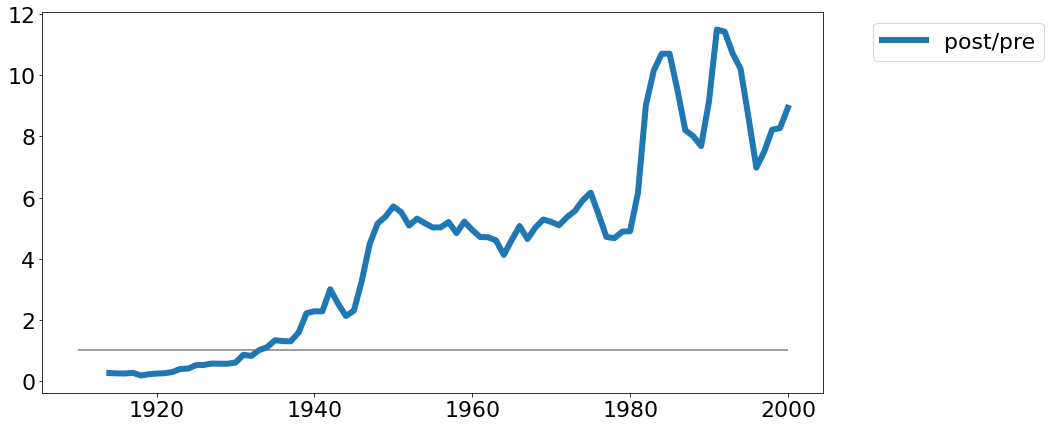

In [81]:
bigrams_cross_div('armen'.split(), 'min din hans hennes'.split(), 'min din hans hennes'.split(), 'arm'.split())


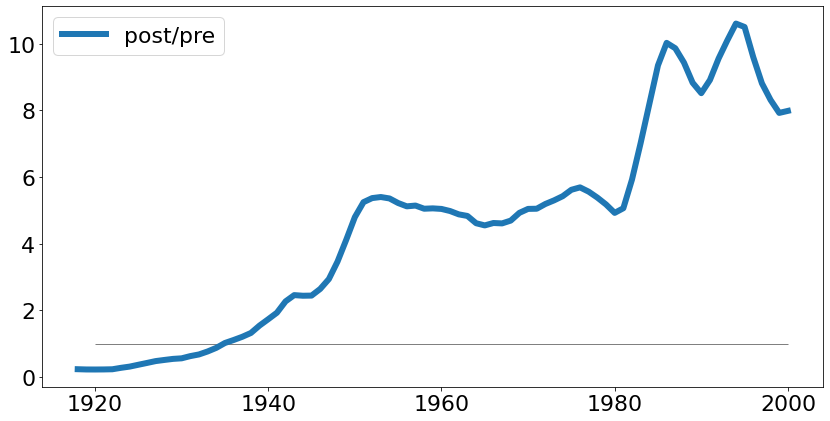

In [82]:
b.plot()
plt.hlines(y = 1, xmin = 1920, xmax = 2000, lw=1, color = "grey")

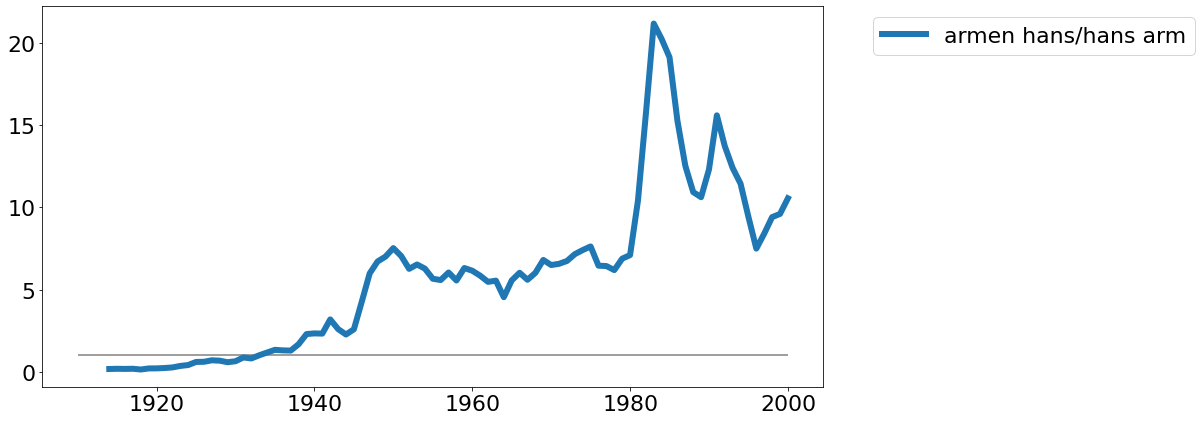

In [83]:
bigrams_cross_div('armen'.split(), 'hans'.split(), 
                  'hans'.split(), 'arm'.split(), title = "armen hans/hans arm")


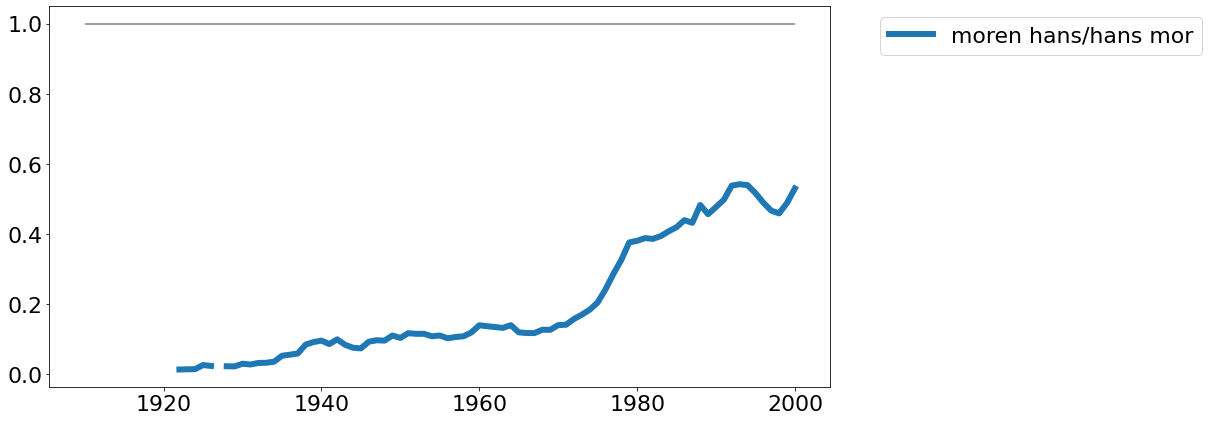

In [84]:

bigrams_cross_div('moren'.split(), 'hans'.split(), 
                  'hans'.split(), 'mor'.split(), title = "moren hans/hans mor")


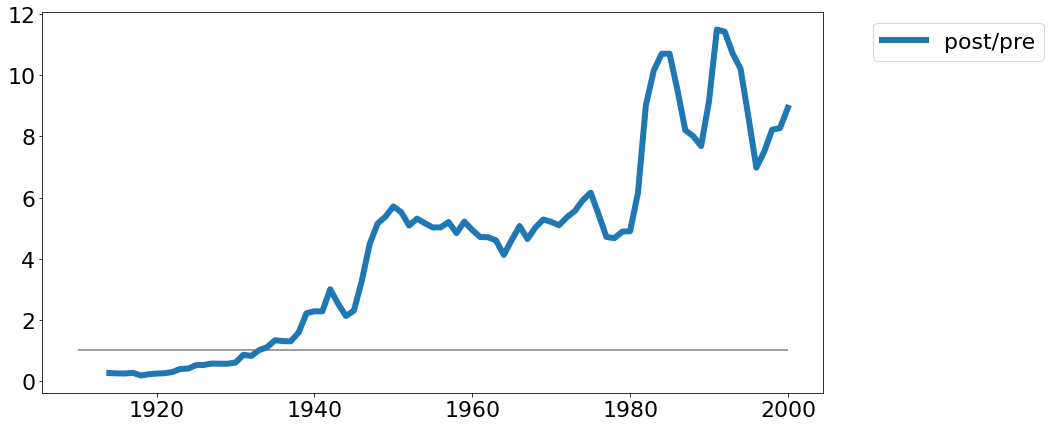

In [88]:
bigrams_cross_div('armen'.split(), 'min din hans hennes'.split(), 'min din hans hennes'.split(), 'arm'.split(), mode = 'abs' )

General

<AxesSubplot:>

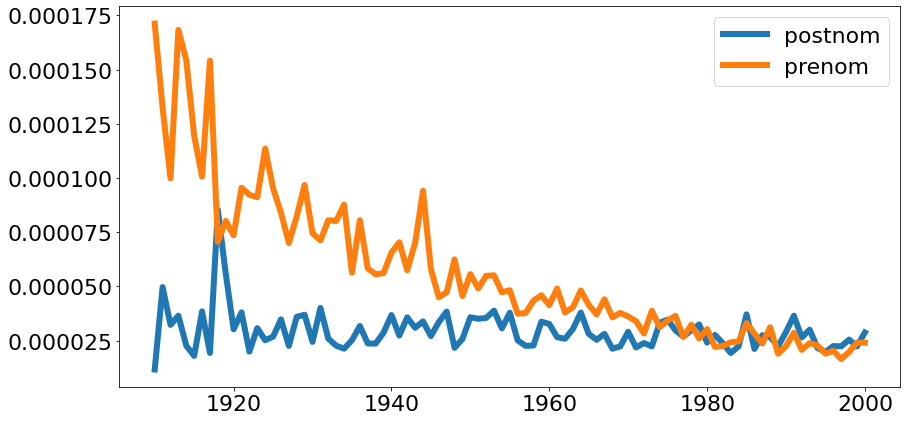

In [115]:
pd.DataFrame(
    {'postnom': bigrams_cross('bilen båten hytta hytten huset veien tårnet filmen stykket'.split(), 'min mitt din ditt hennes hans'.split()),
     'prenom':bigrams_cross('min mitt din ditt hennes hans'.split(), 'bil båt hytte hus tårn film stykke'.split())}).plot()

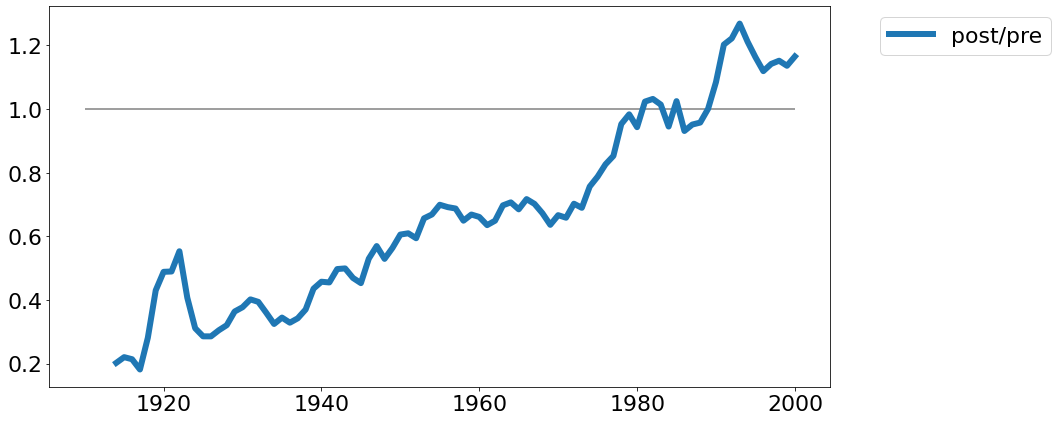

In [89]:
 bigrams_cross_div('bilen båten hytta hytten huset veien tårnet filmen stykket'.split(),
                   'min mitt din ditt hennes hans'.split(), 
    'min mitt din ditt hennes hans'.split(), 'bil båt hytte hus tårn film stykke'.split())

# Bodyparts

<AxesSubplot:>

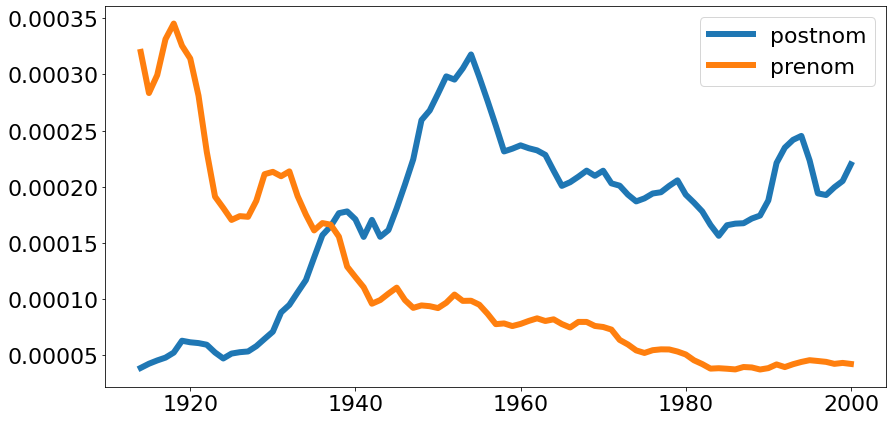

In [25]:
pd.DataFrame(
    {'postnom': bigrams_cross('armen hodet ansiktet nesen munnen foten tåa tåen taaen hånden haanden laaret låret lårene laarene øynene øinene'.split(), 'min mine mitt din dine ditt hennes hans'.split()),
     'prenom':bigrams_cross('min mine mitt din dine ditt hennes hans'.split(), 'arm hode ansikt nese munn fot tå taa hånd haand lår laar øyne øine'.split())}).rolling(window=5).mean().plot()

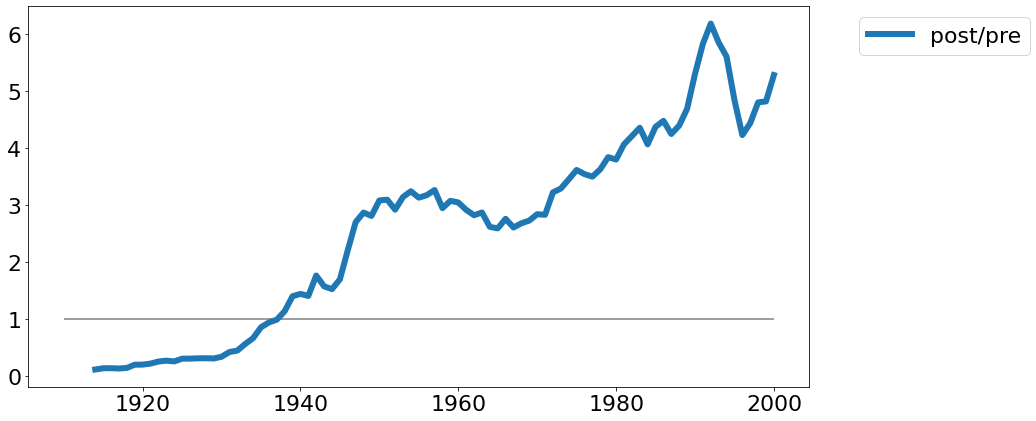

In [90]:
bigrams_cross_div('armen hodet ansiktet nesen munnen foten tåa tåen taaen hånden haanden laaret låret lårene laarene øynene øinene'.split(), 
                  'min mine mitt din dine ditt hennes hans'.split(),
'min mine mitt din dine ditt hennes hans'.split(), 
'arm hode ansikt nese munn fot tå taa hånd haand lår laar øyne øine'.split())

# Family

<AxesSubplot:>

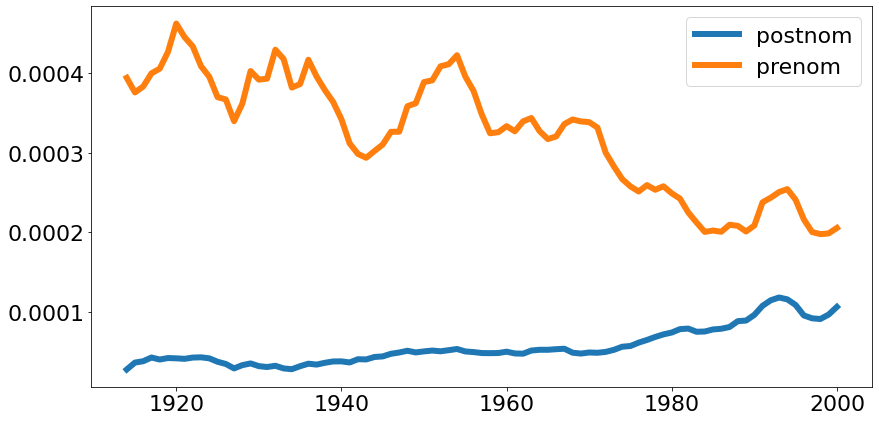

In [27]:
pd.DataFrame(
    {'postnom': bigrams_cross('moren faren sønnen søsteren broren tanten onkelen'.split(), 'min mine mitt din dine ditt hennes hans'.split()),
     'prenom':bigrams_cross('min mine mitt din dine ditt hennes hans'.split(), 'mor far søster bror tante onkel'.split())}).rolling(window=5).mean().plot()

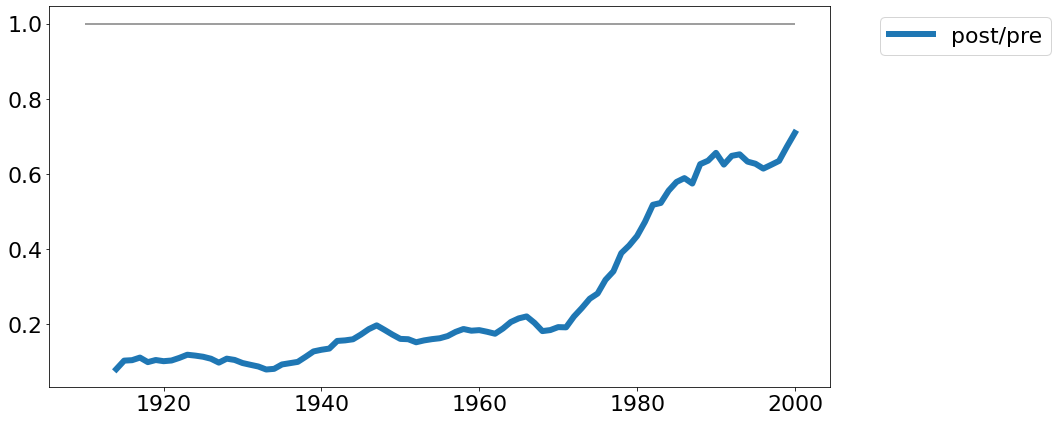

In [92]:
bigrams_cross_div('moren faren sønnen søsteren broren tanten onkelen'.split(),
                  'min mine mitt din dine ditt hennes hans'.split(),
     'mine mitt din dine ditt hennes hans'.split(), 
                            'mor far søster bror tante onkel'.split())

<AxesSubplot:>

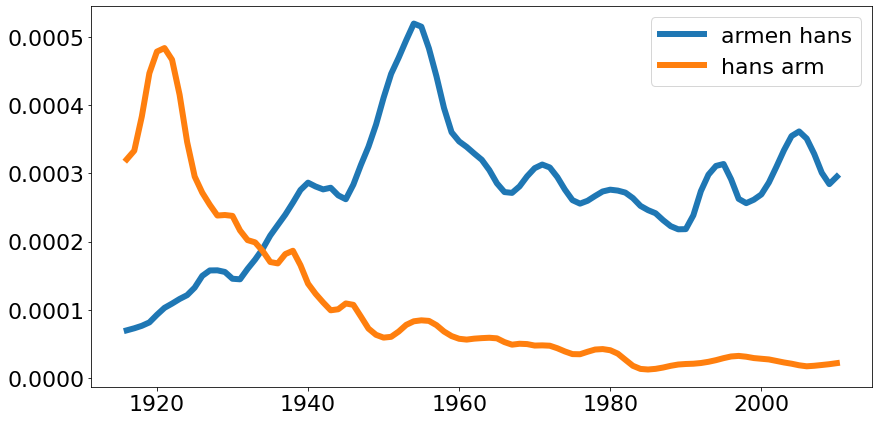

In [29]:
nb.nb_ngram("armen hans, hans arm", years=(1910, 2010), corpus='bok').sort_index().rolling(window=5).mean().plot()

<AxesSubplot:>

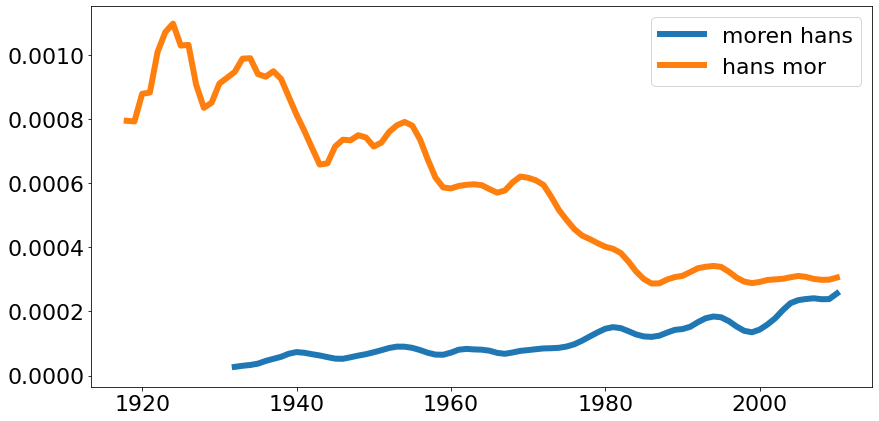

In [30]:
nb.nb_ngram("moren hans, hans mor", years=(1910, 2010), corpus='bok').sort_index().rolling(window=5).mean().plot()

# Genitive effect

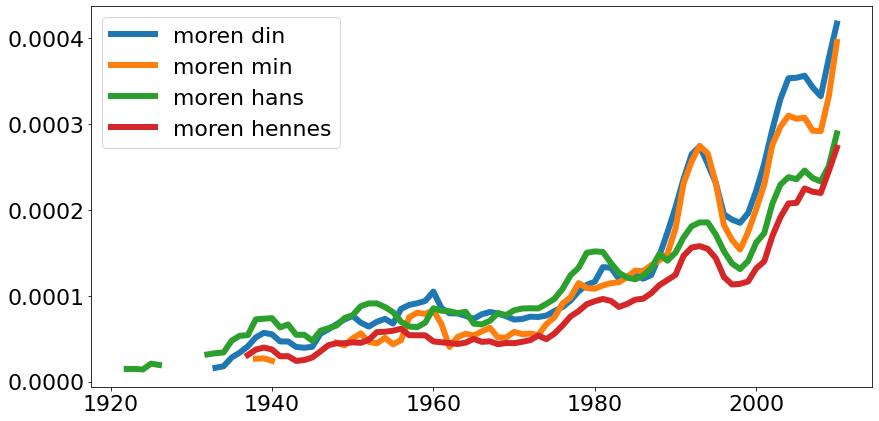

In [31]:
nb.nb_ngram("moren din, moren min, moren hans, moren hennes", years=(1910, 2010), corpus='bok', smooth = 1).sort_index().rolling(window=5).mean().plot();

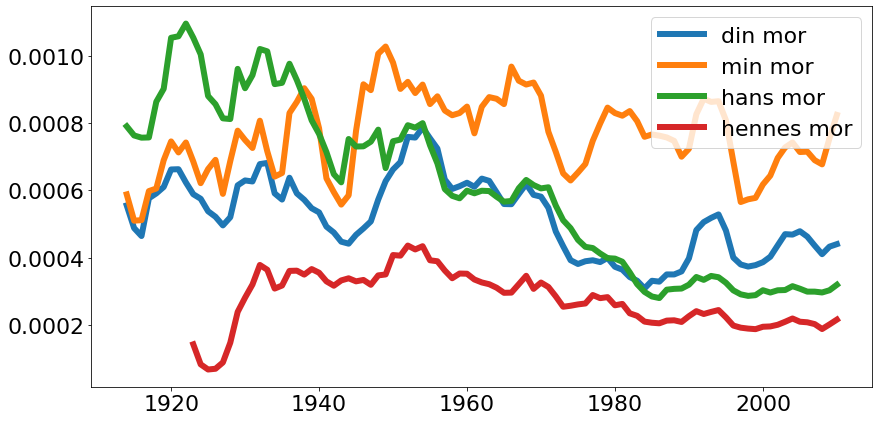

In [32]:
nb.nb_ngram("din mor, min mor, hans mor, hennes mor", years=(1910, 2010), corpus='bok', smooth = 1).sort_index().rolling(window=5).mean().plot();

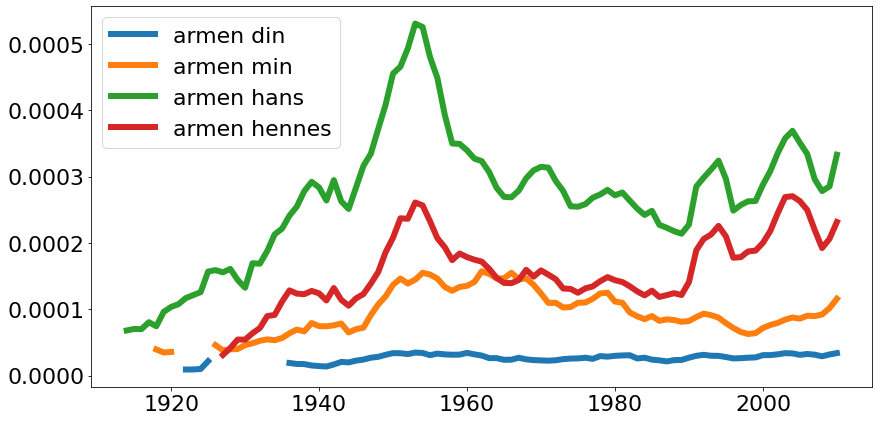

In [33]:
nb.nb_ngram("armen din, armen min, armen hans, armen hennes", years=(1910, 2010), corpus='bok', smooth=1).sort_index().rolling(window=5).mean().plot();

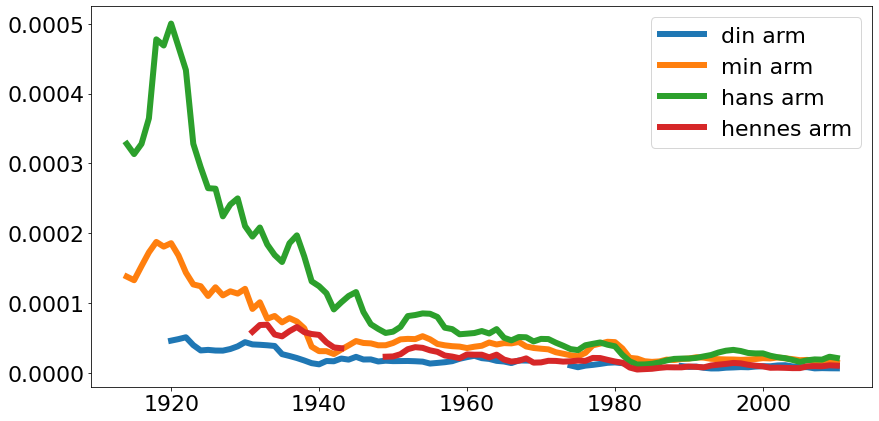

In [34]:
nb.nb_ngram("din arm, min arm, hans arm, hennes arm", years=(1910, 2010), corpus='bok', smooth=1).sort_index().rolling(window=5).mean().plot();

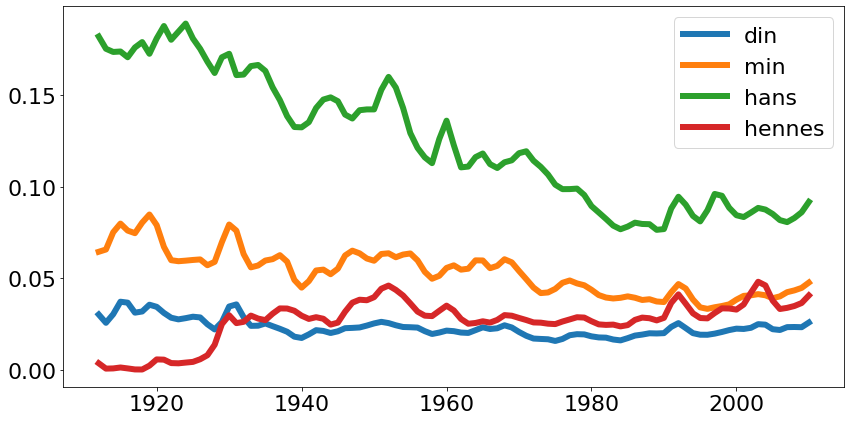

In [35]:
nb.nb_ngram(" din,  min,  hans,  hennes", years=(1910, 2010), corpus='bok').sort_index().plot();

<AxesSubplot:>

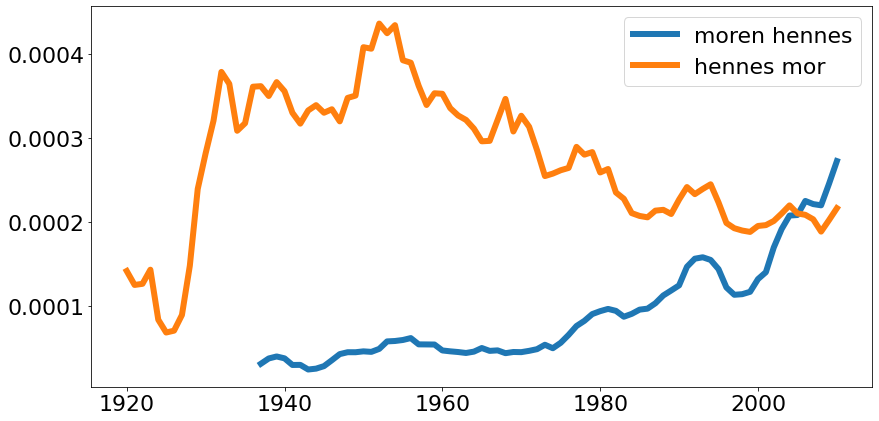

In [36]:
nb.nb_ngram("moren hennes, hennes mor", years=(1910, 2010), smooth = 1).sort_index().rolling(window=5).mean().plot()

<AxesSubplot:>

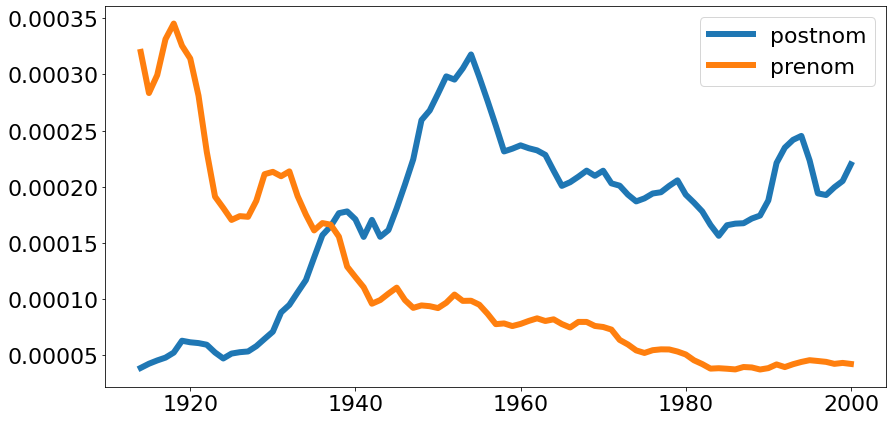

In [37]:
pd.DataFrame(
    {'postnom': bigrams_cross('armen hodet ansiktet nesen munnen foten tåa tåen taaen hånden haanden laaret låret lårene laarene øynene øinene'.split(), 'min mine mitt din dine ditt hennes hans'.split()),
     'prenom':bigrams_cross('min mine mitt din dine ditt hennes hans'.split(), 'arm hode ansikt nese munn fot tå taa hånd haand lår laar øyne øine'.split())}).rolling(window=5).mean().plot()

<AxesSubplot:>

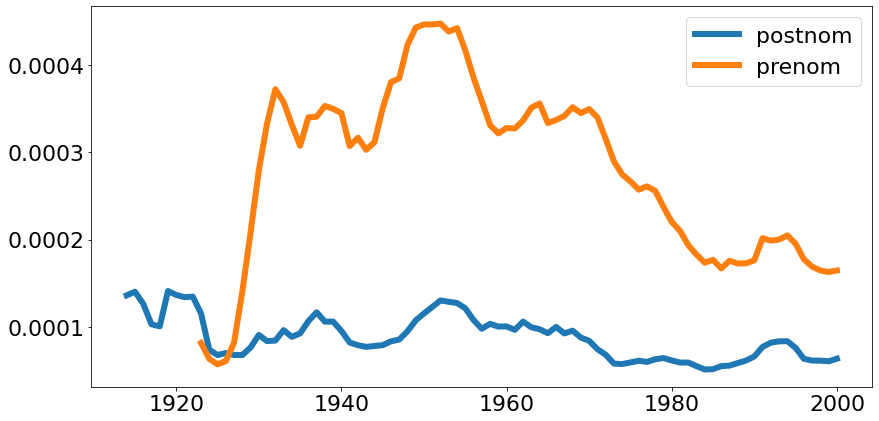

In [113]:
pd.DataFrame(
    {'postnom': bigrams_cross('vennen'.split(),gens),
     'prenom':bigrams_cross(gens, 'venn'.split())}).rolling(window=5).mean().plot()

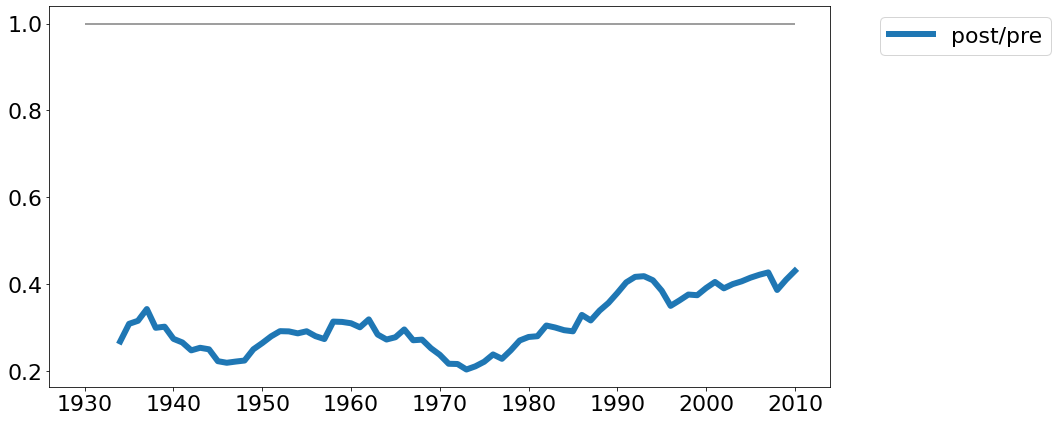

In [119]:
bigrams_cross_div('vennen'.split(),gens,
     gens, 'venn'.split(), years = (1930, 2010))

# Random nouns and selected nouns

In [38]:
tots = nb.totals(2500)

words = list({x.lower() for x in tots})

tagged_words = wb.word_form_many(words)

tagged_words[:10]

nouns = list(set([x[0] for x in tagged_words if 'subst' in x[1]]))

In [39]:
from random import sample

In [40]:
def sample_nouns(nouns, n = 50):
    s1 = sample(nouns, n)
    s1_def_indef = [[x for x in wb.word_variant(w, 'subst') if 'ent ub normert' in x[0] or 'ent be normert' in x[0]] for w in s1]
    pairs = [(x[0][1], x[1][1]) for x in s1_def_indef if x != []]
    return pairs

In [41]:
gens = 'min mine mitt din dine ditt hennes hans'.split()

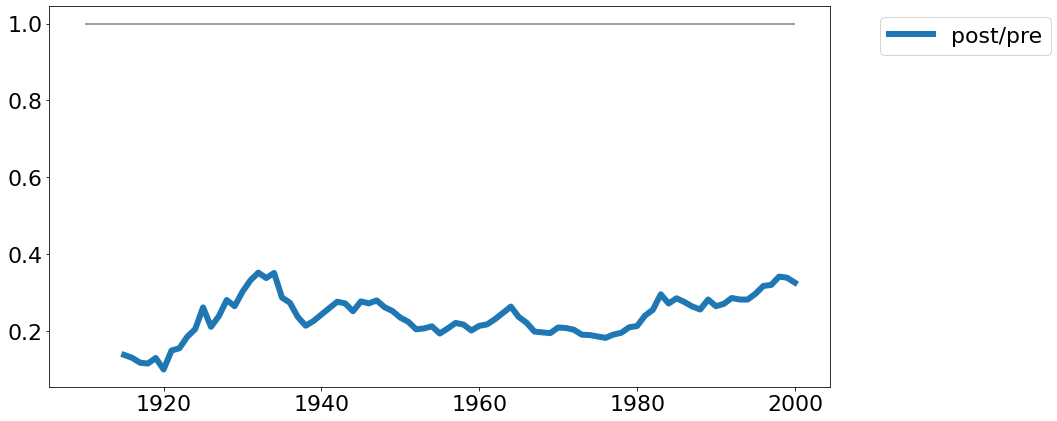

In [93]:
pairs = sample_nouns(nouns, n = 20)
bigrams_cross_div([x[0] for x in pairs], gens,
     gens, [x[1] for x in pairs])


[('eieren', 'eier'), ('dreieren', 'dreier'), ('menet', 'men'), ('våren', 'vår'), ('huska', 'huske'), ('mennesket', 'menneske'), ('tilknytninga', 'tilknytning'), ('haven', 'have'), ('taleren', 'taler'), ('vinduet', 'vindu'), ('kongen', 'kong'), ('jorda', 'jord'), ('huset', 'hus'), ('planen', 'plan'), ('auet', 'au'), ('medet', 'med'), ('gruppa', 'gruppe'), ('nuen', 'nu'), ('veita', 'veit'), ('gifta', 'gift')]


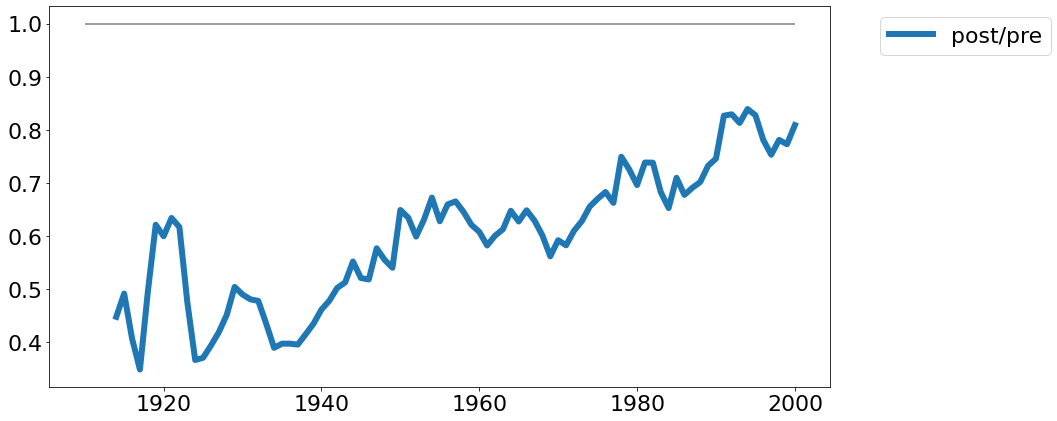

In [94]:
pairs = sample_nouns(nouns, n = 20)
print(pairs)
bigrams_cross_div([x[0] for x in pairs], gens,
     gens, [x[1] for x in pairs])


[('økta', 'økt'), ('vennen', 'venn'), ('jobben', 'jobb'), ('øyeblikket', 'øyeblikk'), ('siget', 'sig'), ('brevet', 'brev'), ('såa', 'så'), ('virkeligheta', 'virkelighet'), ('personen', 'person'), ('varen', 'var'), ('øyet', 'øye'), ('jorda', 'jord'), ('politikken', 'politikk'), ('tusenet', 'tusen'), ('prosjektet', 'prosjekt'), ('rommen', 'rom'), ('veita', 'veit'), ('regnet', 'regn')]


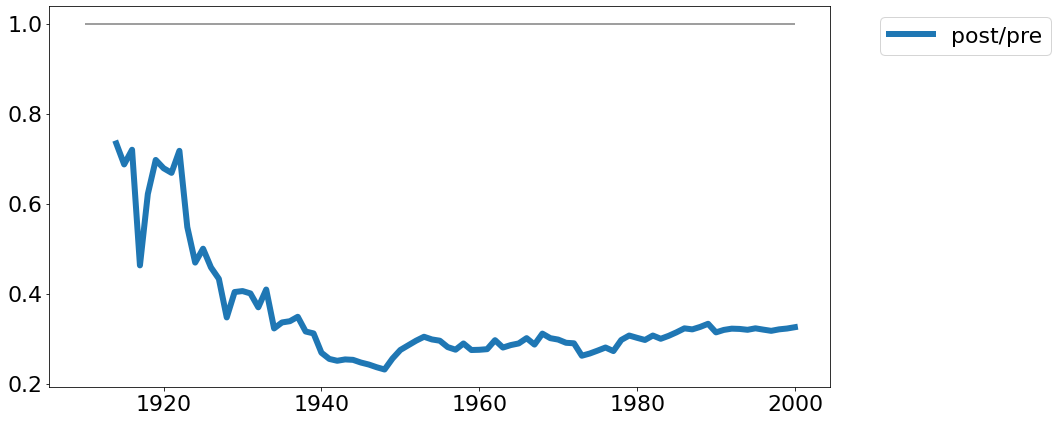

In [95]:
pairs = sample_nouns(nouns, n = 20)
print(pairs)
bigrams_cross_div([x[0] for x in pairs], gens,
     gens, [x[1] for x in pairs])


[('sykehuset', 'sykehus'), ('lyset', 'lys'), ('vennen', 'venn'), ('holderen', 'holder'), ('utgifta', 'utgift'), ('ren', 're'), ('saltet', 'salt'), ('o-en', 'o'), ('viljen', 'vilje'), ('laven', 'lav'), ('byggeren', 'bygger'), ('hviten', 'hvite'), ('merket', 'merke'), ('livet', 'liv'), ('grensa', 'grense'), ('synda', 'synd'), ('boka', 'bok'), ('krigen', 'krig'), ('kvelden', 'kveld')]


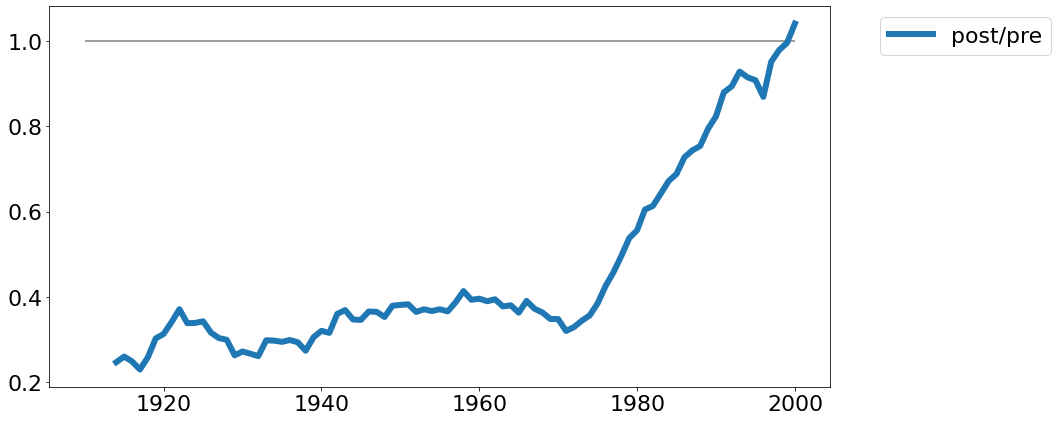

In [97]:
pairs = sample_nouns(nouns, n = 20)
print(pairs)
bigrams_cross_div([x[0] for x in pairs], gens,
     gens, [x[1] for x in pairs])


In [98]:
a_sample = sample_nouns(nouns, n= 500)

In [99]:
def convert_to_number(series):
    if series.empty:
        res = 0
    else:
        res = float(series)
    return res

In [100]:
samples_post = {w[0]:convert_to_number(nb.nb_ngram('{x} hans'.format(x = w[0]), years = (1910, 2000), smooth = 1).sum()) for w in a_sample}

In [101]:
samples_pre = {w[1]: convert_to_number(nb.nb_ngram('hans {x}'.format(x = w[1]), years = (1910, 2000), smooth = 1).sum()) for w in a_sample}

In [102]:
test_sample = list(set([p for p in a_sample if p[0] in pd.DataFrame.from_dict(samples_post, orient = 'index', columns = ['freq']).sort_values(by='freq', ascending = False).head(50).index]) |
set([p for p in a_sample if p[1] in pd.DataFrame.from_dict(samples_pre, orient = 'index', columns = ['freq']).sort_values(by='freq', ascending = False).head(50).index]))

In [ ]:
pd.DataFrame.from_dict(samples_pre, orient = 'index', columns = ['freq']).sort_values(by='freq', ascending = False).head(5)

[('været', 'vær'), ('interessen', 'interesse'), ('bilen', 'bil'), ('hånda', 'hånd'), ('riket', 'rike'), ('synet', 'syn'), ('stillinga', 'stilling'), ('virksomheta', 'virksomhet'), ('medet', 'med'), ('ungen', 'unge'), ('barnet', 'barn'), ('f-en', 'f'), ('armen', 'arm'), ('halsen', 'hals'), ('tanken', 'tanke'), ('skipet', 'skip'), ('ansiktet', 'ansikt'), ('brevet', 'brev'), ('såa', 'så'), ('bringa', 'bringe'), ('ikken', 'ikke'), ('forslaget', 'forslag'), ('hesten', 'hest'), ('øyet', 'øye'), ('læra', 'lære'), ('tida', 'tid'), ('gutten', 'gutt'), ('munnen', 'munn'), ('motet', 'mot'), ('landet', 'land'), ('hela', 'hele'), ('blikket', 'blikk'), ('huset', 'hus'), ('boka', 'bok'), ('ordet', 'ord'), ('preget', 'preg'), ('kjærligheta', 'kjærlighet'), ('håret', 'hår'), ('broren', 'bror'), ('eiendommen', 'eiendom'), ('mora', 'mor'), ('arbeidet', 'arbeid'), ('stedet', 'sted'), ('plassen', 'plass'), ('hjertet', 'hjerte'), ('navnet', 'navn'), ('karakteren', 'karakter'), ('herren', 'herre'), ('fanget'

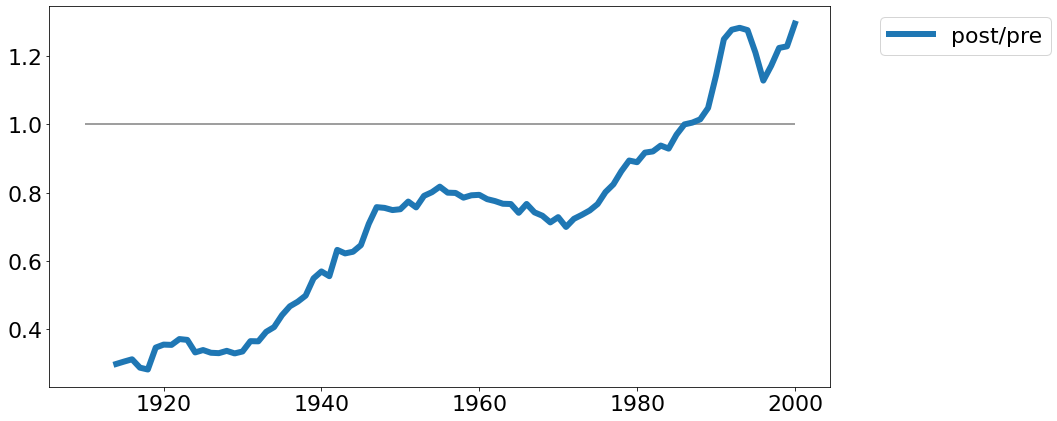

In [103]:
pairs = test_sample
print(pairs)
bigrams_cross_div([x[0] for x in pairs], gens,
     gens, [x[1] for x in pairs])


In [104]:
test_sample_edited = [('gutten', 'gutt'), ('faren', 'fare'), ('barnet', 'barn'),
                      ('interessen', 'interesse'), ('øyet', 'øye'), ('ønsket', 'ønske'), 
                       ('målet', 'mål'), ('tankeren', 'tanker'), 
                      ('bringa', 'bringe'), ('evnen', 'evne'), ('jobben', 'jobb'), ('pusten', 'pust'), ('kontoret', 'kontor'),
                      ('broren', 'bror'), ('stedet', 'sted'), ('eiendommen', 'eiendom'), ('livet', 'liv'), ('mora', 'mor'), 
                      ('foten', 'fot'), ('oppfatninga', 'oppfatning'), ('bilen', 'bil'), 
                      ('hatten', 'hatt'), ('meninga', 'mening'), ('hesten', 'hest'), ('huset', 'hus'),  ('ansiktet', 'ansikt'), ('viljen', 'vilje'), ('saken', 'sak'), 
                      ('presten', 'prest'), ('hjemmet', 'hjem'), ('armen', 'arm'), ('gården', 'gård'), ('båten', 'båt'), ('ordet', 'ord'), 
                      ('stillingen', 'stilling'), ('veien', 'vei'), ('personen', 'person'), ('brevet', 'brev'), ('alderen', 'alder'), ('hånden', 'hånd'), 
                      ('bordet', 'bord'), ('familien', 'familie'), ('benet', 'ben'), ('håret', 'hår'), ('talen', 'tale'), ('rommet', 'rom'), 
                      ('hjertet', 'hjerte'), ('tida', 'tid'), ('folket', 'folk'), ('planen', 'plan'), ('stemmen', 'stem'), ('latteren', 'latter'), 
                      ('landet', 'land'), ('navnet', 'navn'), ('dattera', 'datter'), ('tanken', 'tanke'), ('arbeidet', 'arbeid'), ('blikket', 'blikk'), ('boka', 'bok'), 
                      ('verken', 'verk'), ('sønnen', 'sønn'), ('ryggen', 'rygg'), ('døden', 'død'), ('motet', 'mot'), ('skylda', 'skyld'), 
                      ('handa', 'hand'), ('arbeideren', 'arbeider'), ('forholdet', 'forhold'), ('kroppen', 'kropp'), ('svaret', 'svar'), ('skipet', 'skip')]

[('gutten', 'gutt'), ('faren', 'fare'), ('barnet', 'barn'), ('interessen', 'interesse'), ('øyet', 'øye'), ('ønsket', 'ønske'), ('målet', 'mål'), ('tankeren', 'tanker'), ('bringa', 'bringe'), ('evnen', 'evne'), ('jobben', 'jobb'), ('pusten', 'pust'), ('kontoret', 'kontor'), ('broren', 'bror'), ('stedet', 'sted'), ('eiendommen', 'eiendom'), ('livet', 'liv'), ('mora', 'mor'), ('foten', 'fot'), ('oppfatninga', 'oppfatning'), ('bilen', 'bil'), ('hatten', 'hatt'), ('meninga', 'mening'), ('hesten', 'hest'), ('huset', 'hus'), ('ansiktet', 'ansikt'), ('viljen', 'vilje'), ('saken', 'sak'), ('presten', 'prest'), ('hjemmet', 'hjem'), ('armen', 'arm'), ('gården', 'gård'), ('båten', 'båt'), ('ordet', 'ord'), ('stillingen', 'stilling'), ('veien', 'vei'), ('personen', 'person'), ('brevet', 'brev'), ('alderen', 'alder'), ('hånden', 'hånd'), ('bordet', 'bord'), ('familien', 'familie'), ('benet', 'ben'), ('håret', 'hår'), ('talen', 'tale'), ('rommet', 'rom'), ('hjertet', 'hjerte'), ('tida', 'tid'), ('fol

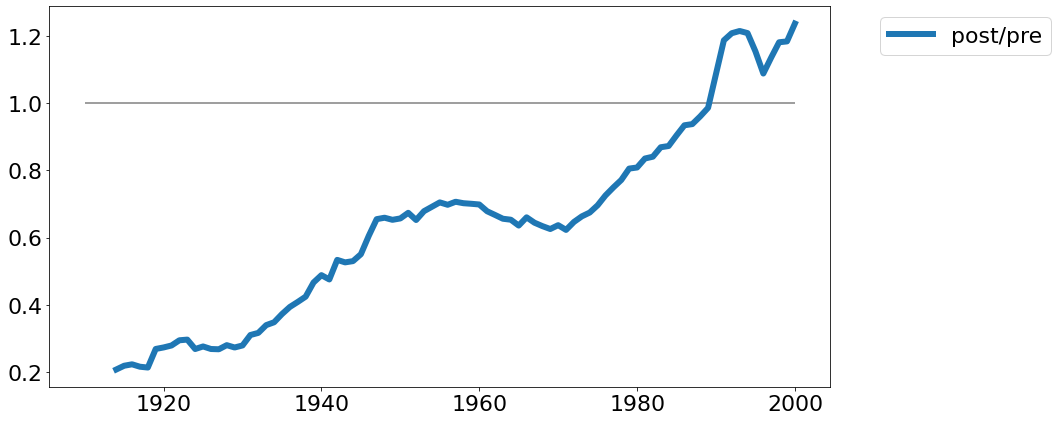

In [105]:
pairs = test_sample_edited
print(pairs)
bigrams_cross_div([x[0] for x in pairs], gens,
     gens, [x[1] for x in pairs])


In [ ]:
nb.nb_ngram("Japan", years = (1810, 2010), smooth=1).rolling(window=5).mean().plot();

[('ballen', 'ball'), ('middagen', 'middag'), ('vesken', 'vesken'), ('genseren', 'genser'), ('jakken', 'jakke'), ('pennen', 'penn'), ('bilen', 'bil'), ('båten', 'båt'), ('kniven', 'kniv'), ('bordet', 'bord'), ('stolen', 'stol'), ('sykkelen', 'sykkel'), ('skoene', 'sko'), ('bildet', 'bilde'), ('buksene', 'bukse'), ('huset', 'hus')]


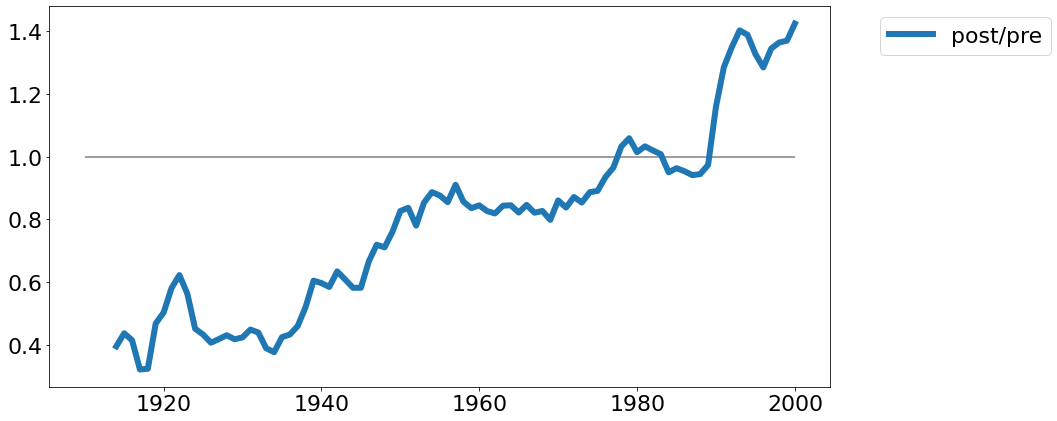

In [106]:
pairs = [('ballen', 'ball'), ('middagen', 'middag'), ('vesken','vesken'), ('genseren', 'genser'), 
         ('jakken', 'jakke'), ('pennen', 'penn'), ('bilen', 'bil'), ('båten', 'båt'), ('kniven', 'kniv'),
        ('bordet', 'bord'), ('stolen', 'stol'), ('sykkelen', 'sykkel'), ('skoene', 'sko'), ('bildet', 'bilde'),
        ('buksene', 'bukse'), ('huset', 'hus')]
print(pairs)
bigrams_cross_div([x[0] for x in pairs], gens,
     gens, [x[1] for x in pairs])

In [120]:
gens

['min', 'mine', 'mitt', 'din', 'dine', 'ditt', 'hennes', 'hans']

In [122]:
years

(1910, 2000)

[('fienden', 'fiende'), ('favoritten', 'favoritt'), ('kollegaen', 'kollega'), ('interessen', 'interesse'), ('sjefen', 'sjef')]


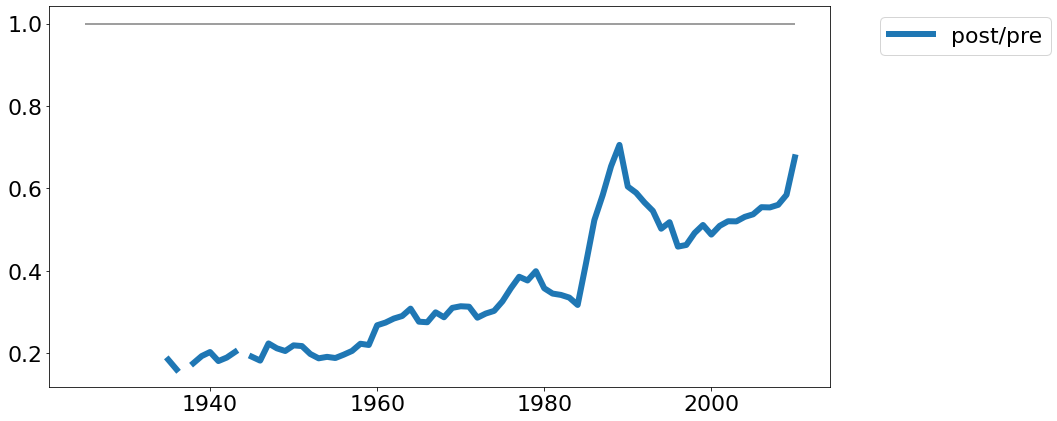

In [124]:

pairs = [('fienden', 'fiende'),('favoritten','favoritt'), ('kollegaen', 'kollega'), 
     ('interessen', 'interesse'), ('sjefen','sjef')]
print(pairs)
bigrams_cross_div([x[0] for x in pairs], gens,
     gens, [x[1] for x in pairs], years =(1925, 2010))

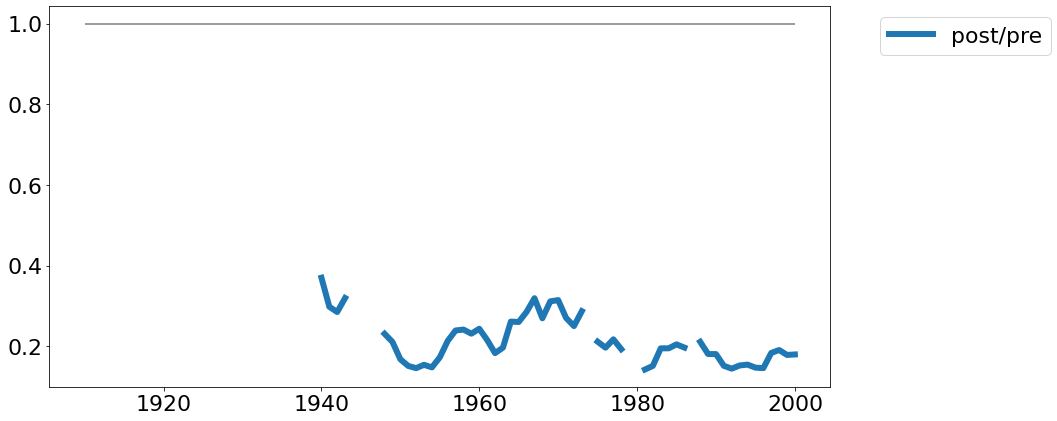

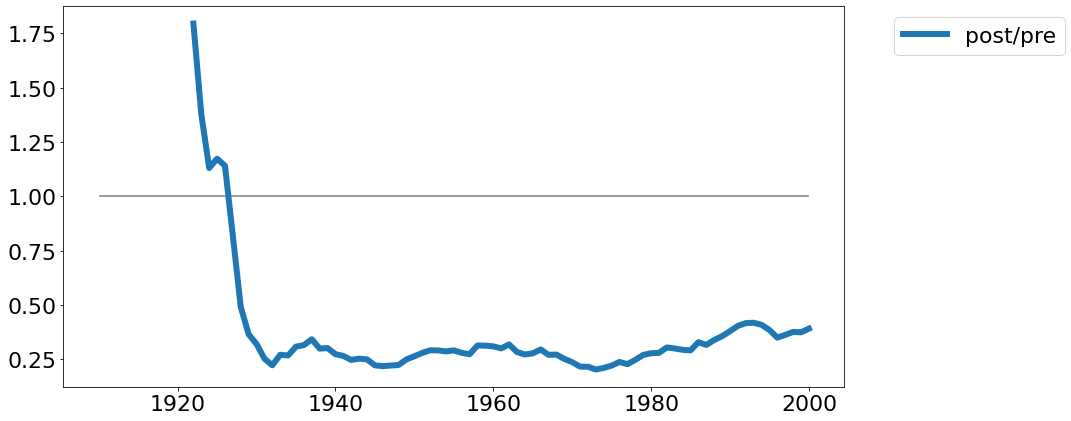

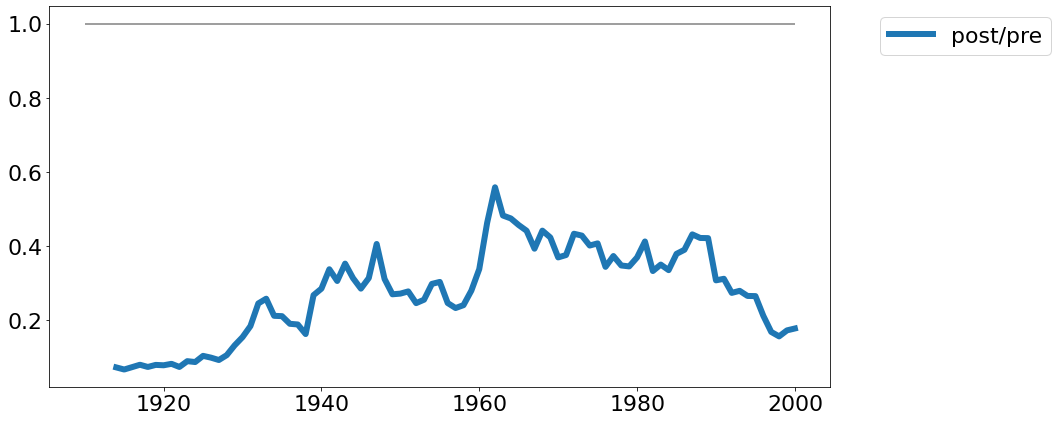

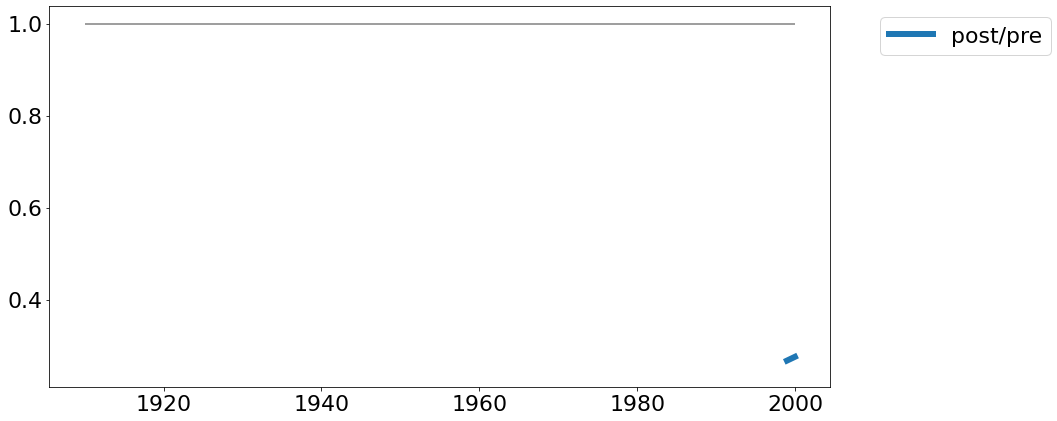

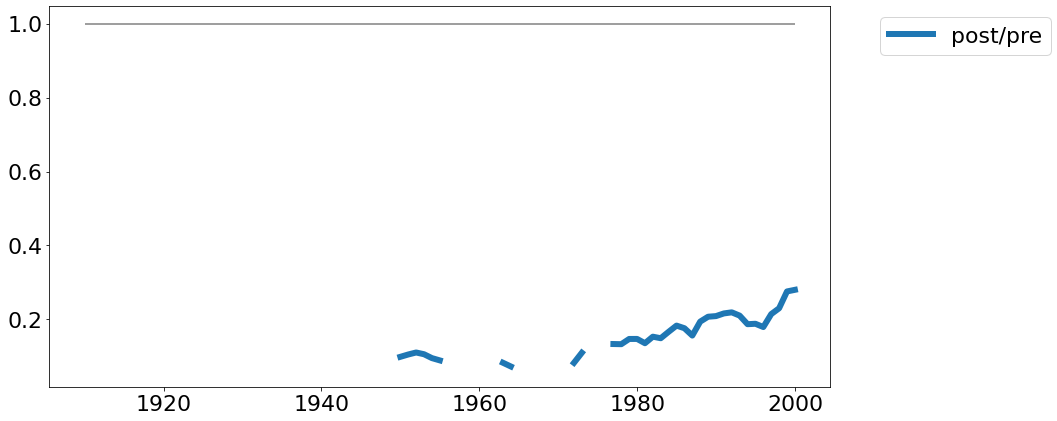

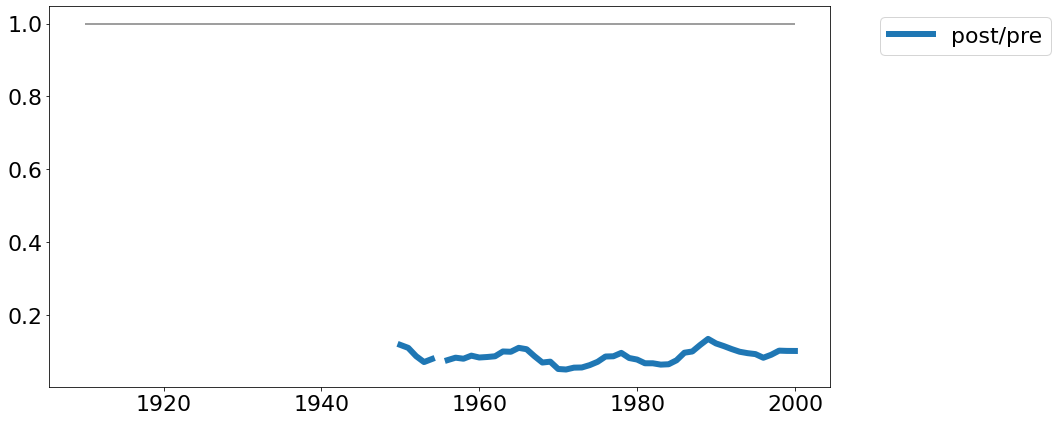

In [110]:
pairs = [('fienden', 'fiende'), ('vennen', 'venn'), ('venen', 'ven'), ('favoritten','favoritt'), ('kollegaen', 'kollega'), 
     ('interessen', 'interesse')]
for p in pairs:
    bigrams_cross_div([p[0]], gens,
     gens, [p[1]])